# Lecture 2 - Testing

In [2]:
import numpy as np

In [3]:
a = np.arange(1,100)
print(a)
print(a.cumprod())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[                   1                    2                    6
                   24                  120                  720
                 5040                40320               362880
              3628800             39916800            479001600
           6227020800          87178291200        1307674368000
       20922789888000      355687428096000     6402373705728000
   121645100408832000  2432902008176640000 -4249290049419214848
 -1250660718674968576  8128291617894825984 -7835185981329244160
  7034535277573963776 -1569523520172457984 -5483646897237262336
 -5968160532966932480 -7055958792655077376 -8764578968847253504
  4999213071378415616 -6045878379276664832  3400198294675

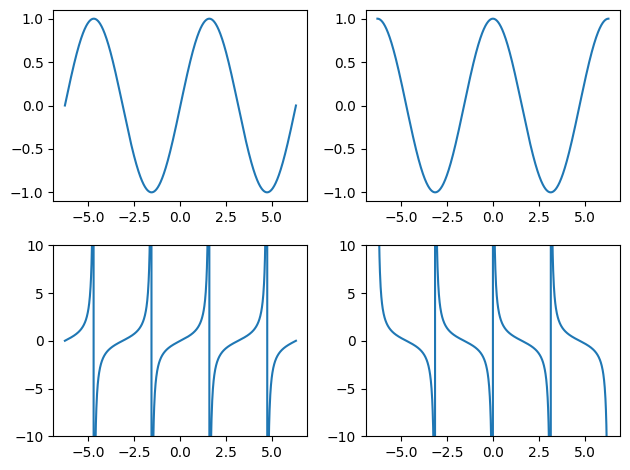

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi,2*np.pi,1000)

fig, ax = plt.subplots (nrows = 2, ncols = 2)

axa = ax[0][0]
axb = ax[0][1]
axc = ax[1][0]
axd = ax[1][1]

axa.plot(x,np.sin(x))
axb.plot(x,np.cos(x))
axc.set_ylim(-10,10)
axc.plot(x,np.tan(x))
axd.set_ylim(-10,10)
axd.plot(x,1/np.tan(x))

fig.tight_layout()
plt.show ()

# Exercises for Lecture 09-10-2023

## Exercise 2.1
Create one-dimensional NumPy arrays using different generation techniques

In [5]:
import numpy as np

a = np.arange(-6,6,2)
b = np.arange(-3,3)
c = np.linspace(-1,1,5)
d = np.empty(5)
e = np.zeros(5)
f = np.array(range(5))
g = np.array([chr(i) for i in range(65,70)])
print(a,c,b,d,e,f,g,sep='\n')

[-6 -4 -2  0  2  4]
[-1.  -0.5  0.   0.5  1. ]
[-3 -2 -1  0  1  2]
[0.0002 0.0002 0.0002 0.0002 0.0002]
[0. 0. 0. 0. 0.]
[0 1 2 3 4]
['A' 'B' 'C' 'D' 'E']


## Exercise 2.2
Create a one-dimentional NumPy array containing a sequence of integer numbers from 1 to 100

Starting from this, create a one-dimensional NumPy array containing in each entry the sum of integer numbers from 1 until the index of that entry

In [6]:
LIMIT = 10 # change to 100
n = np.arange(1,LIMIT + 1)
s = n.cumsum()
print(n,s,sep='\n')

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  3  6 10 15 21 28 36 45 55]


## Exercise 2.3
Create a one-dimensional array containing the sequence of the first 50 even natural numbers

Create a one-dimensional array containing the sequence of the first 50 odd natural numbers

Create a one-dimensional array containing the element-wise sum of the previous two arrays

In [7]:
LEN = 10 # change to 50
e = np.arange(2,LEN*2+1,2)
o = np.arange(1,LEN*2,2)
s = o + e
print('even: ',e,' (len: ',len(e), ')')
print('odd: ',o,' (len: ',len(o), ')')
print('sum: ',s)

even:  [ 2  4  6  8 10 12 14 16 18 20]  (len:  10 )
odd:  [ 1  3  5  7  9 11 13 15 17 19]  (len:  10 )
sum:  [ 3  7 11 15 19 23 27 31 35 39]


## Exercise 2.4
Inside a Python program, the current time may be obtained with the time library:

```python
import time
time_snapshot = time.time()
print(time_snapshot)
```

Compare the time performances of element-wise operations performed between two lists with respect to the same operation performed in compact form between two NumPy arrays

After which size the differences start being significant?

In [8]:
import time
LEN = 1

for l in range(1,8):
    LEN *= 10
    print('LEN: ',LEN)
    start = time.time()
    a = range(LEN)
    b = range(LEN)
    c = [a[i] + b[i] for i in range(0,LEN)]
    stop = time.time()
    print('normal delay: ', np.round((stop-start)*1000,2) ,'ms')

    start = time.time()
    a = np.arange(LEN)
    b = np.arange(LEN)
    c = a+b
    stop = time.time()
    print(' numpy delay: ', np.round((stop-start)*1000,2) ,'ms')



LEN:  10
normal delay:  0.01 ms
 numpy delay:  0.04 ms
LEN:  100
normal delay:  0.02 ms
 numpy delay:  0.01 ms
LEN:  1000
normal delay:  0.17 ms
 numpy delay:  0.01 ms
LEN:  10000
normal delay:  1.37 ms
 numpy delay:  0.36 ms
LEN:  100000
normal delay:  13.71 ms
 numpy delay:  1.79 ms
LEN:  1000000
normal delay:  157.86 ms
 numpy delay:  14.71 ms
LEN:  10000000
normal delay:  1515.21 ms
 numpy delay:  129.39 ms


## Exercise 2.5
After finding how the numpy.sort function works, write a Python library containing a function that determines the median of an array.

Write a main program that tests the performance of the developed function.

In [9]:
def median(a: np.ndarray) -> int:
    a = np.sort(a)
    return a[int(len(a)/2)-1]

LEN = 1
for i in range(0,7):
    LEN *= 10
    
    array = np.random.randint(0,100,size=LEN)
    
    start = time.time()
    m = median(array)
    stop = time.time()
    print(f'LEN: {LEN}, delay: {np.round((stop-start)*1000,2)}ms, median: {m}')




LEN: 10, delay: 0.05ms, median: 36
LEN: 100, delay: 0.04ms, median: 54
LEN: 1000, delay: 0.9ms, median: 53
LEN: 10000, delay: 0.31ms, median: 49
LEN: 100000, delay: 2.64ms, median: 50
LEN: 1000000, delay: 29.2ms, median: 50
LEN: 10000000, delay: 294.82ms, median: 50


## Exercise 2.6
Given an array of numbers, write a Python library containing a function which determines the the value below which lies the 25% of the values, and the one above which lies the 25% of the the values

Generalise the function to the case where the percentage of tails is set as input value

In [10]:
percentage = 25

def barrier_below(a: np.ndarray, barrier: int) -> int: 
    a = np.sort(a)
    return a[int((len(a)/100)*barrier)-1]

def barrier_above(a: np.ndarray, barrier: int) -> int: 
    return barrier_below(a,100-barrier)


array = np.random.randint(0,100,size=1000)
b = barrier_below(array,percentage)
a = barrier_above(array,percentage)
print(f'The value which below lies the {percentage}% of the numbers is {b}')
print(f'The value which above lies the {percentage}% of the numbers is {a}')


The value which below lies the 25% of the numbers is 23
The value which above lies the 25% of the numbers is 75


## Exercise 2.7

Write a Python library containing functions to perform the following operations for NumPy 1D arrays:

Calculate the mean of its elements

Calculate the variance of its elements

Calculate the standard deviation of its elements

Calculate the standard deviation from the mean of its elements

In [11]:
def mean(a):
    return np.sum(a)/len(a)

def variance(a):
    m = mean(a)
    return np.sum([(i-m)**2 for i in a])/len(a)

def std_dev(a):
    return np.sqrt(variance(a))

def std_dev_mean(a):
    return std_dev(a)/np.sqrt(len(a))

a = range(100)
print(mean(a),variance(a),std_dev(a),std_dev_mean(a))


49.5 833.25 28.86607004772212 2.8866070047722117


## Exercise 2.8
Write a program that draws the basic trigonometric functions over a meaningful domain, using NumPy universal functions

Show that the sin and cosin functions differ by a phase

Show that the terms A and B in the equation $f(x) = \sin{(x-A)}+B$
 represent horizontal and vertical translations of the functional form, respectively

Show that the terms C and D in the equation $f(x) = D\cos{Cx}$
 represent horizontal and vertical dilations of the functional form, respectivey

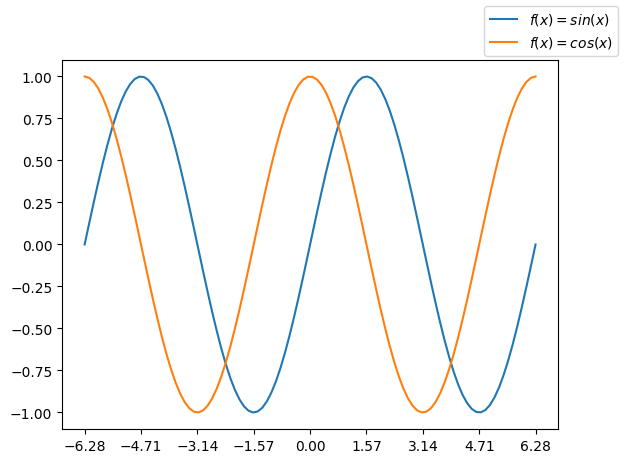

In [12]:
x = np.linspace(-2*np.pi,2*np.pi,100)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x,np.sin(x),label='$f(x) = sin(x)$')
ax.plot(x,np.cos(x),label='$f(x) = cos(x)$')
ax.set_xticks([-2*np.pi,-3*np.pi/2,-np.pi,-np.pi/2,2*np.pi,3*np.pi/2,np.pi,np.pi/2,0])
fig.legend()
plt.show()

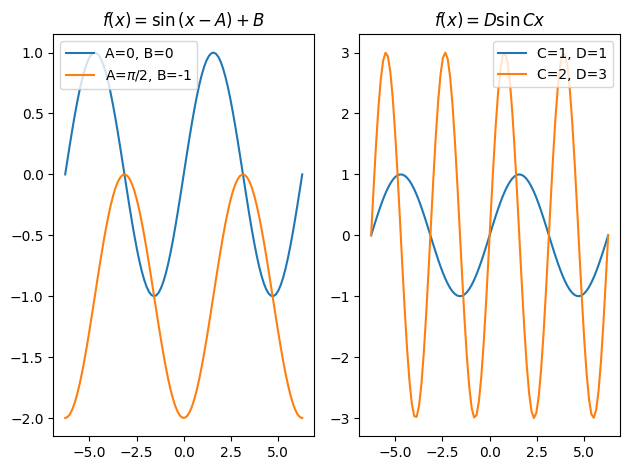

In [13]:
fig,ax = plt.subplots(ncols=2,nrows=1)
axs = ax[0]
axc = ax[1]

A,B = 0,0
axs.plot(x,np.sin(x-A)+B,label='A=0, B=0')
A,B = np.pi/2,-1
axs.plot(x,np.sin(x-A)+B,label='A=$\pi$/2, B=-1')
axs.set_title("$f(x) = \sin{(x-A)}+B$")
axs.legend()

##################################################

C,D = 1,1
axc.plot(x,D*np.sin(C*x),label='C=1, D=1')
C,D = 2,3
axc.plot(x,D*np.sin(C*x),label='C=2, D=3')

axc.set_title("$f(x) = D\sin{Cx}$")
axc.legend()

fig.tight_layout()
plt.show()